In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/

/content/drive/My Drive


In [0]:
import numpy as np 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random

Using TensorFlow backend.


In [0]:
x = np.load('X_data_1.npy')
y = []
x = x[:, :, :, np.newaxis]
print(x.shape)

(300, 200, 200, 1)


In [0]:

for i in range(100):
  y.append(3)
print(np.array(y).shape)

(300,)


In [0]:
y = np.array(y)

In [0]:
from keras.utils import to_categorical
y = to_categorical(y)

In [0]:
print(y[11])

[0. 1. 0. 0.]


In [0]:
print(x[0].shape)

(200, 200, 1)


In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      #print(random_index)
      if istraining:
        im, steering =image_paths[random_index], steering_ang[random_index]
     
      else:
        im, steering =image_paths[random_index], steering_ang[random_index]
      
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

In [0]:
x_train_gen, y_train_gen = next(batch_generator(x, y, 1, 1))

In [0]:
y_train_gen

array([[0., 1., 0., 0.]], dtype=float32)

In [0]:
x_train_gen.shape

(1, 200, 200, 1)

(200, 200)


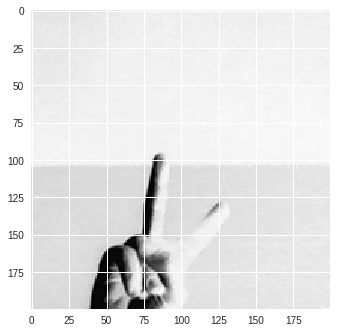

In [0]:
x_train_gen = x_train_gen[0, :,:,0]
print(x_train_gen.shape)
imgplot = plt.imshow(x_train_gen)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(200 , 200, 1), activation='relu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
  model.add(Convolution2D(64, 3, 3, activation='relu'))
  
  model.add(Convolution2D(64, 3, 3, activation='relu'))
  
#   model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
 # model.add(Dense(100, activation = 'relu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'relu'))
#   model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'relu'))
#   model.add(Dropout(0.5))
 
  model.add(Dense(4 ,activation = 'softmax'))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(200, 200,..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3),

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 24)        624       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1036850   
__________

In [0]:
history = model.fit_generator(batch_generator(x, y, 10, 1),
                                  steps_per_epoch=300, 
                                  epochs=1,
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

model.save('gets.h5')


Epoch 1/1
300/300 [==============================] - 6s 19ms/step - loss: 2.3709e-07 - acc: 1.0000


In [0]:
from keras.models import Model,save_model,load_model
model = load_model("gets.h5")
#x_train_gen, y_train_gen = next(batch_generator(resized, y, 1, 1))
result = model.predict(x_train_gen)
result = np.argmax(result)
print(result,y_train_gen)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


NameError: ignored

In [0]:
preds = [[[1.2306378e-09, 1.1323342e-08, 1.1329329e-02, 9.8867071e-01]]]  
preds

[[[1.2306378e-09, 1.1323342e-08, 0.011329329, 0.98867071]]]

In [0]:
y_train_gen

array([[0., 1., 0., 0.]], dtype=float32)

In [0]:
model.save("gest.h5")

In [0]:
print(resized)

NameError: ignored

In [0]:
frame = cv2.imread("WIN_20190222_03_11_51_Pro.jpg")
print(frame.shape)

(720, 1280, 3)


(200, 200, 3)


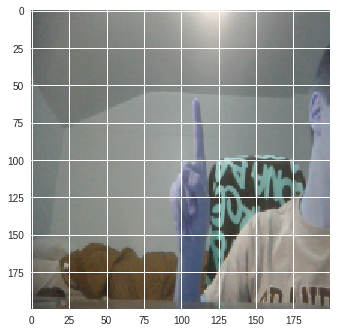

In [0]:

rdim = (200, 200)
# resize image
resized = cv2.resize(frame, rdim, interpolation = cv2.INTER_AREA)
print(resized.shape)
imgplot = plt.imshow(resized)

In [0]:
resized = resized[np.newaxis, :, :,0 ]

resized = resized[:, :, :, np.newaxis]
print(resized.shape)

(1, 200, 200, 1)


In [0]:
result = model.predict(resized)
result = np.argmax(result)
print(result)

3


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

error: ignored